In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import tz
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter
import matplotlib.transforms as mtransforms

In [2]:
df_502_raw = pd.read_csv('502-data-2019-02-19.csv', header=None)
df_503_raw = pd.read_csv('503-data-2019-02-19.csv', header=None)

In [3]:
df_502_raw.head()

,0,1,2
0,502,Tue Feb 19 2019 00:02:23 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
1,502,Tue Feb 19 2019 00:02:25 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
2,502,Tue Feb 19 2019 00:17:12 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
3,502,Tue Feb 19 2019 00:17:14 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
4,502,Tue Feb 19 2019 00:17:16 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...


In [4]:
df_503_raw.head()

,0,1,2
0,503,Tue Feb 19 2019 00:00:01 GMT+0000 (UTC),Detection Box (00100010 01101000)
1,503,Tue Feb 19 2019 00:00:21 GMT+0000 (UTC),Detection Box (01100110 01100000)
2,503,Tue Feb 19 2019 00:00:23 GMT+0000 (UTC),Detection Box (01100110 01100000)
3,503,Tue Feb 19 2019 00:00:24 GMT+0000 (UTC),Detection Box (01100110 01100100)
4,503,Tue Feb 19 2019 00:00:26 GMT+0000 (UTC),Detection Box (01100110 01100000)


# Format and Parse Data

In [5]:
# format of timestamps
t_format = '%b %d %Y %H:%M:%S'
from_zone = tz.gettz('UTC')
to_zone = tz.gettz('America/New_York')

In [6]:
# function to reformat timestamps
def t_rfmt(timestamp):
    # read as datetime object
    tm = datetime.strptime(timestamp, t_format)
    # return datetime converted to local timezone
    return(tm.replace(tzinfo=from_zone).astimezone(to_zone))

In [7]:
# function to parse input by each wire
def wires(reading):
    wire_list = []
    for group in reading.split():
        wire_list.extend(list(group))
    return(wire_list)

In [8]:
# create map of sensor no. and direction
dict_502 = {
    1: 'phase_wb_lft', 
    2: 'phase_eb_str', 
    3: 'phase_NC1',
    4: 'phase_sb_all', 
    5: 'phase_eb_lft', 
    6: 'phase_wb_str',
    7: 'phase_NC2',
    8: 'phase_nb_all',
    9: 'ped_NC1',
    10: 'ped_eb',
    11: 'ped_NC2',
    12: 'ped_NC3',
    13: 'ped_NC4',
    14: 'ped_wb',
    15: 'ped_NC5',
    16: 'ped_nb',
    17: 'loop_wb_lft', 
    18: 'loop_eb_str',
    19: 'loop_NC1',
    20: 'loop_sb_all', 
    21: 'loop_eb_lft', 
    22: 'loop_wb_str',
    23: 'loop_NC2',
    24: 'loop_nb_all',
    25: 'button_NC1',
    26: 'button_NC2',
    27: 'button_NC3',
    28: 'button_NC4',
    29: 'button_NC5',
    30: 'button_NC6',
    31: 'button_NC7',
    32: 'button_NC8'
}

In [9]:
# input sensor data as individual columns
df_502 = pd.DataFrame(list(df_502_raw.loc[:, 2].apply(lambda x: wires(x[15:-1]))), columns=list(range(1, 33)))
# rename columns based on dictionary
df_502.columns = [dict_502[x] for x in df_502.columns]
# convert data type to integers
df_502 = df_502.astype(int)
# insert column for timestamp
df_502.insert(0, 'timestamp', df_502_raw.loc[:, 1].apply(lambda x: t_rfmt(x[4:-15])))
# sort observations by timestamp
df_502.sort_values(by='timestamp', inplace=True)
df_502.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,ped_NC1,...,loop_NC2,loop_nb_all,button_NC1,button_NC2,button_NC3,button_NC4,button_NC5,button_NC6,button_NC7,button_NC8
6183,2019-02-18 19:00:21-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
6184,2019-02-18 19:00:23-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
25335,2019-02-18 19:00:24-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
6185,2019-02-18 19:00:26-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
25336,2019-02-18 19:00:28-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1


In [10]:
# create map of sensor no. and direction
dict_503 = {
    1: 'phase_wb_lft', 
    2: 'phase_eb_str', 
    3: 'phase_NC1',
    4: 'phase_sb_all', 
    5: 'phase_eb_lft', 
    6: 'phase_wb_str',
    7: 'phase_NC2',
    8: 'phase_nb_all',
    9: 'loop_wb_lft', 
    10: 'loop_eb_str',
    11: 'loop_NC1',
    12: 'loop_sb_all', 
    13: 'loop_eb_lft', 
    14: 'loop_wb_str',
    15: 'loop_NC2',
    16: 'loop_nb_all'
}

In [11]:
# input sensor data as individual columns
df_503 = pd.DataFrame(list(df_503_raw.loc[:, 2].apply(lambda x: wires(x[15:-1]))), columns=list(range(1, 17)))
# rename columns based on dictionary
df_503.columns = [dict_503[x] for x in df_503.columns]
# convert data type to integers
df_503 = df_503.astype(int)
# insert column for timestamp
df_503.insert(0, 'timestamp', df_503_raw.loc[:, 1].apply(lambda x: t_rfmt(x[4:-15])))
# sort observations by timestamp
df_503.sort_values(by='timestamp', inplace=True)
df_503.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,loop_wb_lft,loop_eb_str,loop_NC1,loop_sb_all,loop_eb_lft,loop_wb_str,loop_NC2,loop_nb_all
0,2019-02-18 19:00:01-05:00,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0
1,2019-02-18 19:00:21-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0
2,2019-02-18 19:00:23-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0
3,2019-02-18 19:00:24-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
4,2019-02-18 19:00:26-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0


# No Count Columns

In [12]:
# check for no count columns
for column in df_502.columns[1:]:
    print(column, ': ', df_502[column].unique())

phase_wb_lft :  [0 1]
phase_eb_str :  [1 0]
phase_NC1 :  [1]
phase_sb_all :  [0 1]
phase_eb_lft :  [0 1]
phase_wb_str :  [1 0]
phase_NC2 :  [1]
phase_nb_all :  [0 1]
ped_NC1 :  [1]
ped_eb :  [0 1]
ped_NC2 :  [1]
ped_NC3 :  [1]
ped_NC4 :  [1]
ped_wb :  [0 1]
ped_NC5 :  [1]
ped_nb :  [0 1]
loop_wb_lft :  [0 1]
loop_eb_str :  [0]
loop_NC1 :  [1]
loop_sb_all :  [0 1]
loop_eb_lft :  [0 1]
loop_wb_str :  [0 1]
loop_NC2 :  [1]
loop_nb_all :  [0 1]
button_NC1 :  [1]
button_NC2 :  [1]
button_NC3 :  [1]
button_NC4 :  [1]
button_NC5 :  [1]
button_NC6 :  [1]
button_NC7 :  [1]
button_NC8 :  [1]


In [13]:
# check for no count columns
for column in df_503.columns[1:]:
    print(column, ': ', df_503[column].unique())

phase_wb_lft :  [0 1]
phase_eb_str :  [0 1]
phase_NC1 :  [1]
phase_sb_all :  [0 1]
phase_eb_lft :  [0 1]
phase_wb_str :  [0 1]
phase_NC2 :  [1]
phase_nb_all :  [0 1]
loop_wb_lft :  [0 1]
loop_eb_str :  [1 0]
loop_NC1 :  [1]
loop_sb_all :  [0 1]
loop_eb_lft :  [1 0]
loop_wb_str :  [0 1]
loop_NC2 :  [0 1]
loop_nb_all :  [0 1]


# Plots

In [50]:
df_502_plot = df_502.copy()
# replace all 0 values with None
df_502_plot.iloc[:, 1:] = df_502_plot.iloc[:, 1:].replace(to_replace=[0], value=[None])
# convert timestamp to hour:minute:second
# df_502_plot.iloc[:, 0] = df_502_plot.iloc[:, 0].apply(lambda x: x.time)
df_502_plot.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,ped_NC1,...,loop_NC2,loop_nb_all,button_NC1,button_NC2,button_NC3,button_NC4,button_NC5,button_NC6,button_NC7,button_NC8
6183,2019-02-18 19:00:21-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
6184,2019-02-18 19:00:23-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
25335,2019-02-18 19:00:24-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
6185,2019-02-18 19:00:26-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
25336,2019-02-18 19:00:28-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1


In [51]:
df_503_plot = df_503.copy()
# replace all 0 values with None
df_503_plot.iloc[:, 1:] = df_503_plot.iloc[:, 1:].replace(to_replace=[0], value=[None])
# convert timestamp to hour:minute:second
# df_503_plot.iloc[:, 0] = df_503_plot.iloc[:, 0].apply(lambda x: x.time)
df_503_plot.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,loop_wb_lft,loop_eb_str,loop_NC1,loop_sb_all,loop_eb_lft,loop_wb_str,loop_NC2,loop_nb_all
0,2019-02-18 19:00:01-05:00,None,None,1,None,None,None,1,None,None,1,1,None,1,None,None,None
1,2019-02-18 19:00:21-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,None,None,None
2,2019-02-18 19:00:23-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,None,None,None
3,2019-02-18 19:00:24-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,1,None,None
4,2019-02-18 19:00:26-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,None,None,None


In [64]:
x = dates.date2num(df_503_plot.iloc[:200, :]['timestamp'])
y = df_503_plot.iloc[:200, :]['phase_eb_str']
z = df_503_plot.iloc[:200, :]['loop_eb_str']

In [67]:
x = dates.date2num(df_503_plot['timestamp'])
y = df_503_plot['phase_eb_str']
z = df_503_plot['loop_eb_str']

In [69]:
myFmt = DateFormatter("%H")

In [79]:
df_503_plot['timestamp'].apply(lambda x: x.hour)

0        19
1        19
2        19
3        19
4        19
5        19
6        19
7        19
8        19
9        19
10       19
11       19
12       19
13       19
14       19
15       19
16       19
17       19
18       19
19       19
20       19
21       19
22       19
23       19
24       19
25       19
26       19
27       19
28       19
29       19
         ..
43615    18
43616    18
43617    18
43618    18
43619    18
43620    18
43621    18
43622    18
43623    18
43624    18
43625    18
43626    18
43627    18
43628    18
43629    18
43630    18
43631    18
43632    18
43633    18
43634    18
43635    18
43636    18
43637    18
43638    18
43639    18
43640    18
43641    18
43642    18
43643    18
43644    18
Name: timestamp, Length: 43645, dtype: int64

In [82]:
myFmt = DateFormatter("%H")

In [112]:
def traff_plot(t_stamp, phase, loop):
    ax.scatter(t_stamp, loop)
    ax.set_yticks([])
    ax.xaxis.set_major_locator(dates.HourLocator())
    ax.xaxis.set_major_formatter(myFmt)
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(0.5, 1.5)
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.fill_between(t_stamp, 0, 1, where=phase == 1, facecolor='green', alpha=0.5, transform=trans)
    return(ax)

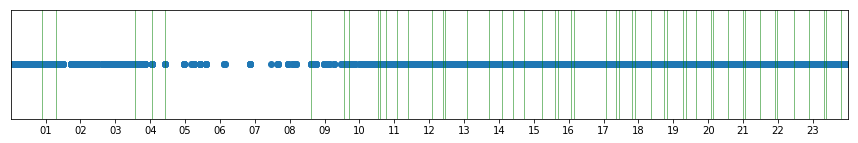

In [115]:
fig, ax = plt.subplots(figsize=(15, 2))
traff_plot(x, y, z);

In [ ]:
fig, ax = plt.subplots(figsize=(15, 2))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 2))
for i in range(6):
    ax[i].scatter()

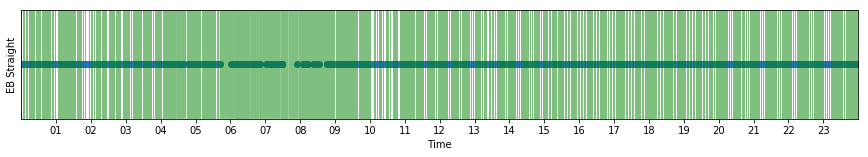

In [87]:
fig, ax = plt.subplots(figsize=(15, 2))
ax.scatter(x, z)
ax.set_ylabel('EB Straight')
ax.set_yticks([])
ax.set_xlabel('Time')
ax.xaxis.set_major_locator(dates.HourLocator())
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlim(min(x), max(x))
ax.set_ylim(0.5, 1.5)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x, 0, 1, where=y == 1, facecolor='green', alpha=0.5, transform=trans);

In [88]:
x = dates.date2num(df_503_plot['timestamp'])
y = df_503_plot['phase_wb_lft']
z = df_503_plot['loop_wb_lft']

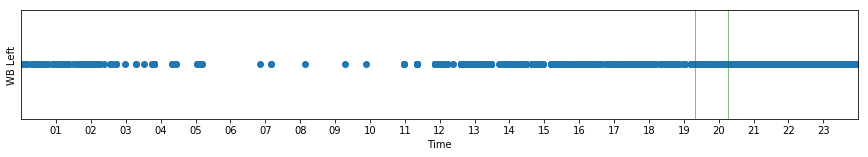

In [89]:
fig, ax = plt.subplots(figsize=(15, 2))
ax.scatter(x, z)
ax.set_ylabel('WB Left')
ax.set_yticks([])
ax.set_xlabel('Time')
ax.xaxis.set_major_locator(dates.HourLocator())
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlim(min(x), max(x))
ax.set_ylim(0.5, 1.5)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x, 0, 1, where=y == 1, facecolor='green', alpha=0.5, transform=trans);

In [94]:
x = dates.date2num(df_503_plot['timestamp'])
y = df_503_plot['phase_sb_all']
z = df_503_plot['loop_sb_all']

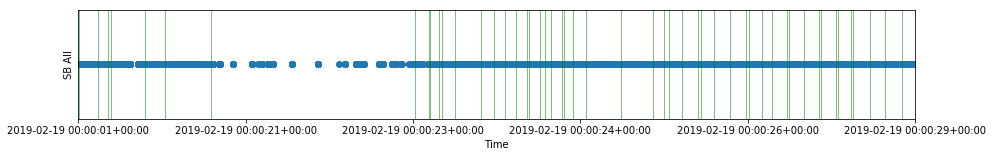

In [123]:
fig, ax = plt.subplots(figsize=(15, 2))
ax.scatter(x, z)
ax.set_ylabel('SB All')
ax.set_yticks([])
ax.set_xlabel('Time')
# ax.xaxis.set_major_locator(dates.HourLocator())
# ax.xaxis.set_major_formatter(myFmt)
ax.set_xticklabels(dates.num2date(x))
ax.set_xlim(min(x), max(x))
ax.set_ylim(0.5, 1.5)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x, 0, 1, where=y == 1, facecolor='green', alpha=0.5, transform=trans);

In [135]:
dates.num2date(x)[1]

datetime.datetime(2019, 2, 19, 0, 0, 21, tzinfo=<matplotlib.dates._UTC object at 0x7fa053827cf8>)

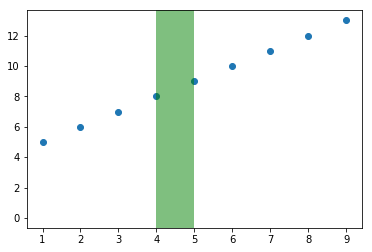

In [79]:
fig, ax = plt.subplots()
x = np.arange(1, 10)
y = np.arange(5, 14)
z = np.array([11, 5, 7, 19, 12, 3, 18, 6, 20])
ax.scatter(x, y)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x, 0, 1, where=z > 10, facecolor='green', alpha=0.5, transform=trans)

In [21]:
x = dates.date2num(df_502['timestamp'])
y = df_502_plot['loop_wb_lft']
z = df_502_plot['phase_wb_lft']

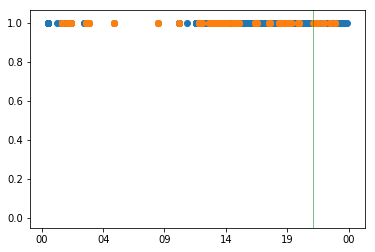

In [24]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.scatter(x, z)
ax.xaxis.set_major_formatter(myFmt)
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(x, 0, 1, where=z == 1, facecolor='green', alpha=0.5, transform=trans)

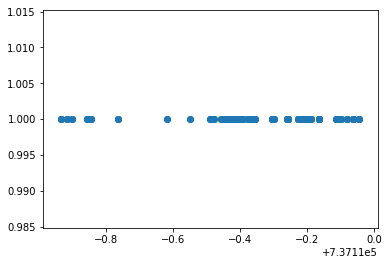

In [68]:
plt.scatter(x, z)

In [23]:
myFmt = DateFormatter("%H")

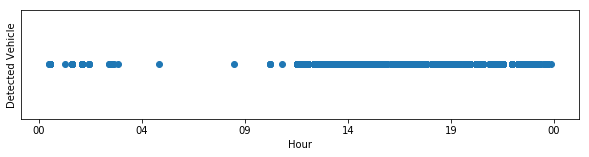

In [79]:
fig, ax = plt.subplots(figsize = (10,2))
ax.scatter(x, y)
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Detected Vehicle')
ax.set_yticks([])
ax.set_xlabel('Hour');

In [50]:
df_502['timestamp'][0]

Timestamp('2019-02-18 19:02:23-0500', tz='dateutil//usr/share/zoneinfo/America/New_York')

In [34]:
plt_tm = dates.date2num(df_503['timestamp'][:1000])

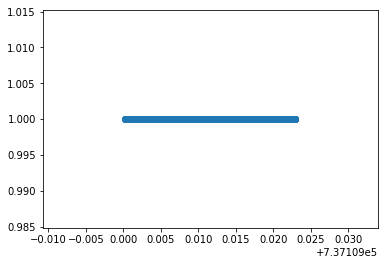

In [52]:
plt.scatter(plt_tm, df_503_plot['phase'][2][:1000])

In [49]:
np.arange(3)

array([0, 1, 2])